## Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загружаем данные
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except FileNotFoundError:
    display('Такого файла не существует!')

### Изучение и предобработка данных в датафрейме visits

Изучим и выполним предобработку данных в датафрейме visits. 

In [3]:
visits.sample(5)

,User Id,Region,Device,Channel,Session Start,Session End
82376,120664916939,United States,iPhone,organic,2019-07-22 02:34:27,2019-07-22 03:08:51
233150,677273898846,Germany,PC,LeapBob,2019-06-23 10:10:00,2019-06-23 10:12:20
90783,648967250812,United States,iPhone,FaceBoom,2019-07-30 21:05:02,2019-07-30 21:51:39
2331,581747760789,United States,iPhone,TipTop,2019-05-04 03:48:32,2019-05-04 03:59:11
83622,169099455891,United States,iPhone,FaceBoom,2019-07-23 23:04:27,2019-07-23 23:23:46


**Таблица visits содержит следующую информацию:**
- `User Id` - уникальный идентификатор пользователя;
- `Region` - страна пользователя;
- `Device` - тип устройства пользователя;
- `Channel` - идентификатор источника перехода;
- `Session Start` - дата и время начала сессии;
- `Session End` - дата и время окончания сессии.

In [4]:
# изменим названия столбцов
visits = visits.rename(columns={'User Id':'user_id', 'Region':'region', 'Device':'device', \
                                'Channel':'channel', 'Session Start':'session_start', \
                                'Session End':'session_end'})

In [5]:
# check
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Выведем осоновную информацию о датафрейме с помощью метода info().

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Таблица с исходными данными содержит 6 столбцов и 309901 строк. Пропусков в данных нет. Обратим внимание, что столбцы `session_start` и `session_end` содержат дату и время, но тип данных object. Приведем эти столбцы к типу datetime.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
# check
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Выведем список уникальных значений столбцов `region`, `device` и `channel`.

In [9]:
visits.region.unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [10]:
visits.device.unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [11]:
visits.channel.unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Аномальных значений или неявных дубликатов в этих столбцах не обнаружено.

Проверим временной интервал столбца session_start на соответствие условию проекта, данные о пользователях должны быть с 1 мая по 27 октября 2019 года.

In [12]:
visits.session_start.describe(datetime_is_numeric=True)

count                           309901
mean     2019-08-06 13:29:38.176540416
min                2019-05-01 00:00:41
25%                2019-06-23 22:17:33
50%                2019-08-10 10:56:43
75%                2019-09-23 00:23:42
max                2019-10-31 23:59:23
Name: session_start, dtype: object

Последнее число датируется 31 октября 2019 года. Удалим строки после 27 октября 2019 года.

In [13]:
visits = visits[~(visits['session_start'] >= '2019-10-28')]

In [14]:
# check
visits.session_start.describe(datetime_is_numeric=True)

count                           306253
mean     2019-08-05 13:24:47.837866240
min                2019-05-01 00:00:41
25%                2019-06-23 09:50:10
50%                2019-08-09 10:37:21
75%                2019-09-21 19:30:19
max                2019-10-27 23:59:04
Name: session_start, dtype: object

Проверим временной интервал столбца session_end.

In [15]:
visits.session_end.describe(datetime_is_numeric=True)

count                           306253
mean     2019-08-05 13:54:48.190270976
min                2019-05-01 00:07:06
25%                2019-06-23 10:19:04
50%                2019-08-09 11:06:18
75%                2019-09-21 19:57:18
max                2019-10-28 02:08:14
Name: session_end, dtype: object

Удалим строки после 27 октября 2019 года.

In [16]:
visits = visits[~(visits['session_end'] >= '2019-10-28')]

In [17]:
# check
visits.session_end.describe(datetime_is_numeric=True)

count                           306206
mean     2019-08-05 13:36:21.576242944
min                2019-05-01 00:07:06
25%      2019-06-23 10:13:46.750000128
50%         2019-08-09 10:45:57.500000
75%      2019-09-21 19:35:28.750000128
max                2019-10-27 23:58:17
Name: session_end, dtype: object

Вывем на экран количество строк-дубликатов в данных.

In [18]:
visits.duplicated().sum()

0

В датафрейме visits нет строк-дубликатов.

Построим общую гистограмму для всех числовых столбцов таблицы.

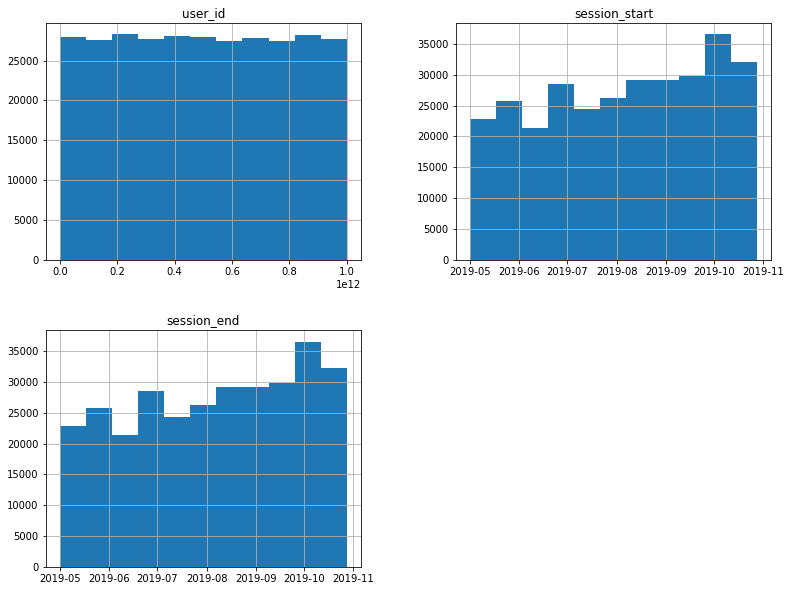

In [19]:
visits.hist(figsize=(13, 10), bins=11);

### Изучение и предобработка данных в датафрейме orders

Изучим и выполним предобработку данных в датафрейме orders.

In [20]:
orders.sample(5)

,User Id,Event Dt,Revenue
33633,201829133465,2019-08-21 01:40:10,4.99
31190,297030217520,2019-07-16 05:44:08,4.99
31517,907285679447,2019-07-22 06:38:44,4.99
14100,388931974670,2019-08-24 13:59:52,4.99
3534,909832134343,2019-06-14 18:58:09,4.99


**Таблица orders содержит следующую информацию:**
- `User Id` - уникальный идентификатор пользователя;
- `Event Dt` - дата и время покупки;
- `Revenue` - сумма заказа.

In [21]:
# изменим названия столбцов
orders = orders.rename(columns={'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'})            

In [22]:
# check
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Выведем осоновную информацию о датафрейме с помощью метода info().

In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Таблица с исходными данными содержит 3 столбца и 40212 строк. Пропусков в данных нет. Обратим внимание, что столбец event_dt содержит дату и время, но тип данных object. Приведем этот столбец к типу datetime.

In [24]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [25]:
# check
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Изучим данные столбца `revenue`, проверим, нет ли там отрицательных значений с помощью метода describe().

In [26]:
orders.revenue.describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

Отрицательных значений в столбце `revenue` не обнаружено.

Проверим временной интервал столбца event_dt.

In [27]:
orders.event_dt.describe(datetime_is_numeric=True)

count                            40212
mean     2019-08-18 21:31:11.158037504
min                2019-05-01 00:28:11
25%      2019-07-10 20:15:34.249999872
50%                2019-08-24 15:15:30
75%         2019-09-30 05:24:46.500000
max                2019-10-31 23:56:56
Name: event_dt, dtype: object

Удалим строки с 28 октября 2019 года.

In [28]:
orders = orders[~(orders['event_dt'] >= '2019-10-28')]

In [29]:
# check
orders.event_dt.describe(datetime_is_numeric=True)

count                            39125
mean     2019-08-16 21:29:36.667220480
min                2019-05-01 00:28:11
25%                2019-07-09 16:24:21
50%                2019-08-22 10:58:24
75%                2019-09-27 17:16:37
max                2019-10-27 23:55:15
Name: event_dt, dtype: object

Вывем на экран количество строк-дубликатов в данных.

In [30]:
orders.duplicated().sum()

0

В исходных данных нет строк-дубликатов.

Построим общую гистограмму для всех числовых столбцов таблицы.

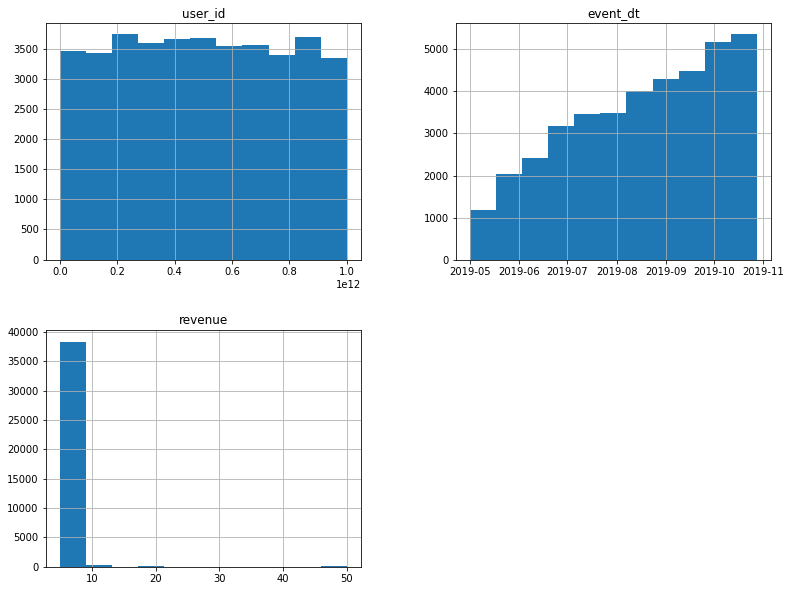

In [31]:
orders.hist(figsize=(13, 10), bins=11);

### Изучение и предобработка данных в датафрейме costs

Изучим и выполним предобработку данных в датафрейме costs.

In [32]:
costs.sample(5)

,dt,Channel,costs
554,2019-05-15,TipTop,49.00
1228,2019-09-26,LeapBob,12.81
931,2019-06-01,AdNonSense,18.90
977,2019-07-17,AdNonSense,17.85
932,2019-06-02,AdNonSense,30.45


Таблица costs содержит следующую информацию:
- `dt` - дата проведения рекламной кампании;
- `Channel` - идентификатор рекламного источника;
- `costs` - расходы на эту кампанию.

In [33]:
# приведем названия столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()

Выведем осоновную информацию о датафрейме с помощью метода info().

In [34]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таблица с исходными данными содержит 3 столбца и 1800 строк. Пропусков в данных нет. Обратим внимание, что столбец dt содержит дату, поэтому сразу приведем его к date.

In [35]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Изучим уникальные значения столбца `channel`.

In [36]:
costs.channel.unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявных дубликатов в столбце `channel` не обнаружено.

Изучим данные столбца `costs`, проверим, нет ли там отрицательных значений с помощью метода describe().

In [37]:
costs.costs.describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Отрицательных значений в столбце `costs` не обнаружено.

Проверим временной интервал столбца dt.

In [38]:
# check
costs.dt.max()

datetime.date(2019, 10, 27)

In [39]:
# check
costs.dt.min()

datetime.date(2019, 5, 1)

Даты в столбце dt соответствуют техническому заданию.

Вывем на экран количество строк-дубликатов в данных.

In [40]:
costs.duplicated().sum()

0

В исходных данных нет строк-дубликатов.

Построим общую гистограмму для всех числовых столбцов таблицы.

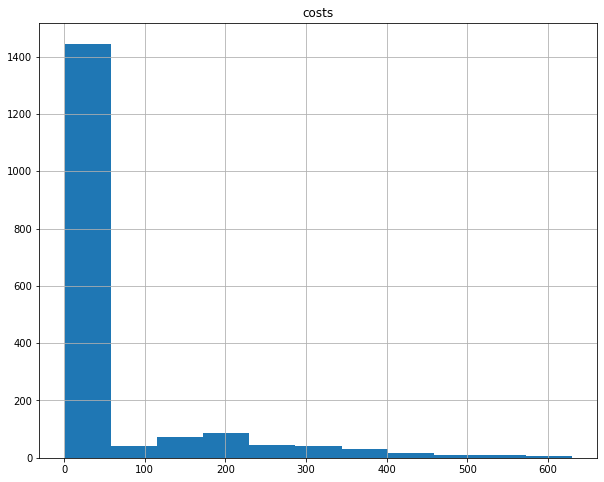

In [41]:
costs.hist(figsize=(10, 8), bins=11);

## Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция get_profiles()

Создадим функцию `get_profiles()` - для создания профилей пользователей.

In [42]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция get_retention()

Создадим функцию `get_retention()` - для подсчёта Retention Rate.

In [43]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция get_conversion()

Создадим функцию `get_conversion()` - для подсчёта конверсии.

In [44]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
         orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция get_ltv()

Создадим функцию `get_ltv()` - для подсчёта LTV и ROI.

In [45]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция filter_data()

Создадим функцию `filter_data()` - для сглаживания данных.

In [46]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция plot_retention()

Создадим функцию `plot_retention()` - для построения графика Retention Rate.

In [47]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция plot_conversion()

Создадим функцию `plot_conversion()` - для построения графика конверсии.

In [48]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция plot_ltv_roi

Создадим функцию `plot_ltv_roi` - для визуализации LTV и ROI.

In [49]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Профили пользователей. Минимальная и максимальная даты привлечения пользователей

Составим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Вызовем функцию `get_profiles()`, чтобы составить профили пользователей по данным сессий из датафрейма visits.

In [50]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
48042,318457018808,2019-06-09 02:51:58,organic,PC,United States,2019-06-09,2019-06-01,False,0.000000
28923,192413646877,2019-07-12 20:10:43,organic,Android,United States,2019-07-12,2019-07-01,False,0.000000
147332,982416944070,2019-05-27 06:47:40,organic,iPhone,Germany,2019-05-27,2019-05-01,False,0.000000
141963,947415410772,2019-05-23 05:04:27,FaceBoom,iPhone,United States,2019-05-23,2019-05-01,False,1.052688
62832,417082805876,2019-09-22 15:03:43,AdNonSense,iPhone,France,2019-09-22,2019-09-01,False,0.945000


Результат - 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить приложение Procrastinate Pro+.

Определим минимальную и максимальную дату привлечения клиентов.

In [51]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

Минимальная дата - 1 мая 2019 года.

In [52]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

Максимальная дата - 27 октября 2019 года.

**Вывод:** минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года.

Найденые нами минимальная и максимальная даты привлечения совпадают с данными технического задания, в котором было указано, что нам предоставили данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

### Страны, из которых пользователи приходят в приложение. Страна, на которую приходится больше всего платящих пользователей.

Выясним, из каких стран пользователи приходят в приложение.

In [53]:
region = (profiles.groupby('region')
           .agg({'user_id': 'count'})
           .sort_values(by='user_id', ascending=False))
region

,user_id
region,
United States,99987
UK,17573
France,17448
Germany,14978


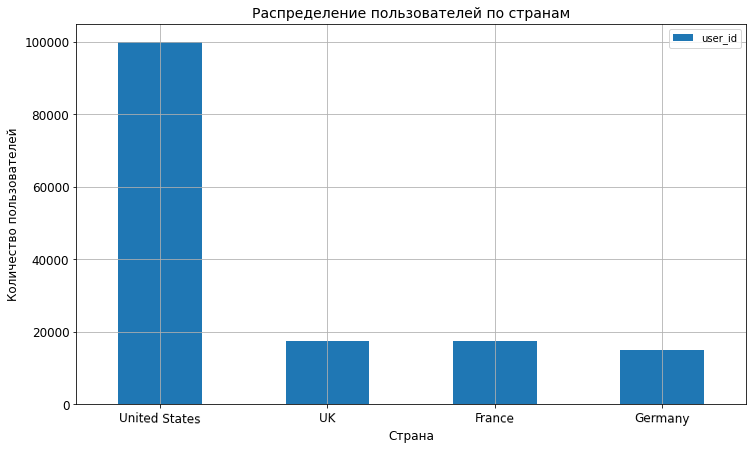

In [54]:
# визуализируем данные таблицы region
region.reset_index()
region.plot(kind='bar', 
             figsize = (12, 7), 
             rot = -1, grid = True, 
             legend = True, 
             fontsize = 12);

plt.ylabel('Количество пользователей', fontsize = 12)
plt.xlabel('Страна', fontsize = 12)
plt.title('Распределение пользователей по странам', fontsize = 14);

plt.show()

Пользователи приходят в приложение из США, Великобритании, Франции и Германии. Самое большое количество пользователей приходят в приложении из США - 99987. Из Великобритании и Франции приходят практически одинаковое количество пользователей - 17573 и 17448 соответственно. Самое маленькое количество пользователей приходя из Германии - 14978.

Узнаем, на какую страну приходится больше всего платящих пользователей.

In [55]:
# сгруппируем профили по столбцу region,
# долю покупателей посчитаем как среднее по колонке payer
region_payer = (profiles.groupby('region')
                 .agg({'user_id': 'count',
                       'payer': 'mean'})
                 .sort_values(by='payer', ascending=False)
                 .style.format({'payer': '{:.2%}'}))
region_payer

,user_id,payer
region,,
United States,99987,6.87%
Germany,14978,4.10%
UK,17573,3.93%
France,17448,3.77%


Визуализируем данные таблицы region_payer. Но для начала, исходя из доли платящих пользователей, посчитаем их количество.

In [56]:
region_payer = (profiles.groupby('region')
                 .agg({'user_id': 'count',
                       'payer': 'mean'})
                 .sort_values(by='payer', ascending=False)) 

# добавим столбец 'count_payer' - количество платящих пользователей
region_payer['count_payer'] = region_payer['payer']*region_payer['user_id']

# переведем значения столбца 'payer' в проценты
region_payer['payer'] = region_payer['payer']*100

# округлим значения столбца 'payer' до двух знаков после запятой
region_payer['payer'] = region_payer['payer'].round(2)

# переименуем названия столбцов
region_payer.columns = ['user_id', 'payer, %', 'count_payer']

region_payer

,user_id,"payer, %",count_payer
region,,,
United States,99987,6.87,6871.0
Germany,14978,4.10,614.0
UK,17573,3.93,690.0
France,17448,3.77,657.0


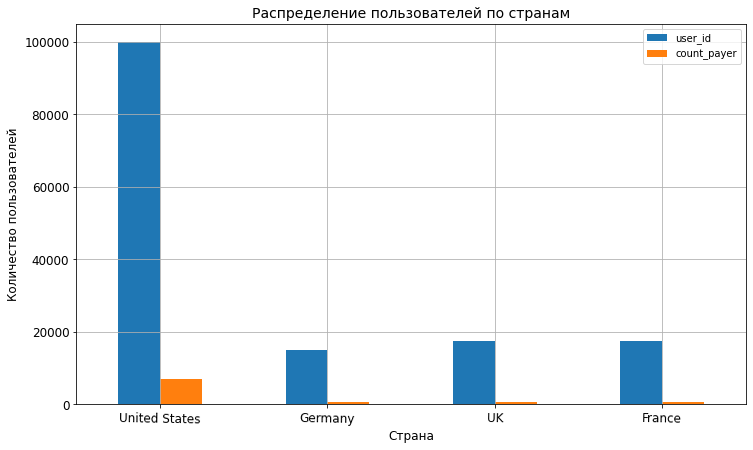

In [57]:
# визуализируем данные по столбцам 'user_id' и 'count_payer'
region_payer.reset_index()

region_payer[['user_id','count_payer']].plot(kind='bar', 
                                             figsize = (12, 7),
                                             rot = -1,
                                             grid = True,
                                             legend = True, 
                                             fontsize = 12);
plt.ylabel('Количество пользователей', fontsize = 12);
plt.xlabel('Страна', fontsize = 12);
plt.title('Распределение пользователей по странам', fontsize = 14);

Больше всего платящих пользователей, как и их количество, приходят из США. Количество платящих пользователей, приходящих из Германии, Великобритании и Франции, очень мало, на графике их количество практически сливается с нулем.

**Вывод:** пользователи приходят в приложение из США, Великобритании, Франции и Германии. 

Самая большая доля платящих пользователей приходят из США - 6.9%, самая маленькая, из Франции - 3.8%.

### Устройства, которыми пользуются клиенты. Устройства, которые предпочитают платящие пользователи.

Выясним, какими устройствами пользуются клиенты приложения Procrastinate Pro+.

In [58]:
device = (profiles.groupby('device')
          .agg({'user_id': 'count'})
          .sort_values(by='user_id', ascending=False))
device

,user_id
device,
iPhone,54468
Android,35030
PC,30451
Mac,30037


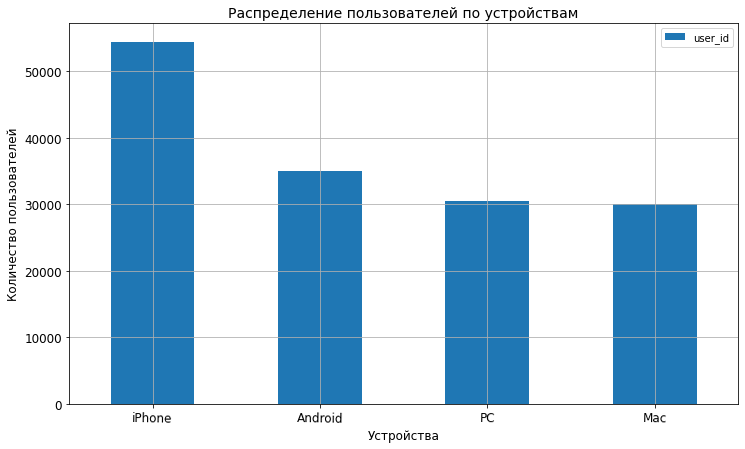

In [59]:
# визуализируем данные таблицы device
device.reset_index()
device.plot(kind='bar', 
             figsize = (12, 7), 
             rot = -1, grid = True, 
             legend = True, 
             fontsize = 12);

plt.ylabel('Количество пользователей', fontsize = 12)
plt.xlabel('Устройства', fontsize = 12)
plt.title('Распределение пользователей по устройствам', fontsize = 14);

plt.show()

Клиенты используют такие устройства как: iPhone, Android, PC и Mac. Самым распространенным устройством является iPhone, его используют 54468 пользователей. Android - пользуются 35030 клиентов. Такими устройствами, как PC и Mac пользуются практически одинаковое количество клиентов - 30451 и 30037 соответственно.

Узнаем, какие устройства предпочитают платящие пользователи.

In [60]:
# сгруппируем профили по столбцу device,
# долю покупателей посчитаем как среднее по колонке payer
device_payer = (profiles.groupby('device')
                .agg({'user_id': 'count',
                      'payer': 'mean'})
                .sort_values(by='payer', ascending=False)
                .style.format({'payer': '{:.2%}'}))
device_payer

,user_id,payer
device,,
Mac,30037,6.34%
iPhone,54468,6.18%
Android,35030,5.81%
PC,30451,5.01%


Визуализируем данные таблицы device_payer. Но для начала, исходя из доли платящих пользователей, посчитаем их количество.

In [61]:
device_payer = (profiles.groupby('device')
                .agg({'user_id': 'count',
                      'payer': 'mean'})
                .sort_values(by='payer', ascending=False)) 

# добавим столбец 'count_payer' - количество платящих пользователей
device_payer['count_payer'] = device_payer['payer']*device_payer['user_id']

# переведем значения столбца 'payer' в проценты
device_payer['payer'] = device_payer['payer']*100

# округлим значения столбца 'payer' до двух знаков после запятой
device_payer['payer'] = device_payer['payer'].round(2)

# переименуем названия столбцов
device_payer.columns = ['user_id', 'payer, %', 'count_payer']

device_payer

,user_id,"payer, %",count_payer
device,,,
Mac,30037,6.34,1904.0
iPhone,54468,6.18,3367.0
Android,35030,5.81,2036.0
PC,30451,5.01,1525.0


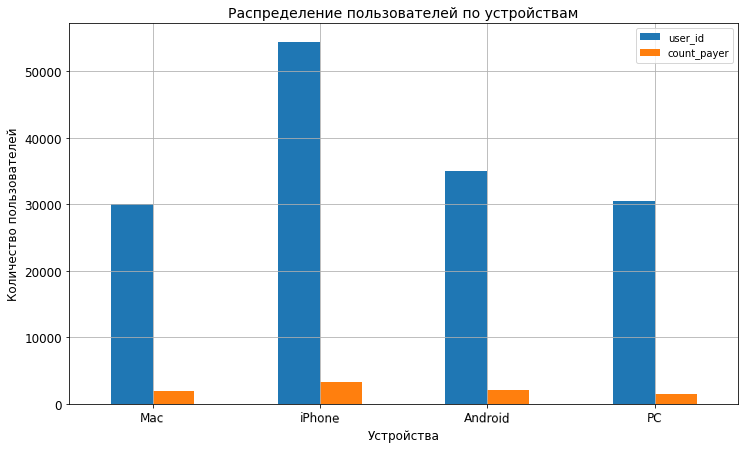

In [62]:
# визуализируем данные по столбцам 'user_id' и 'count_payer'
device_payer.reset_index()

device_payer[['user_id','count_payer']].plot(kind='bar', 
                                             figsize = (12, 7),
                                             rot = -1,
                                             grid = True,
                                             legend = True, 
                                             fontsize = 12);
plt.ylabel('Количество пользователей', fontsize = 12);
plt.xlabel('Устройства', fontsize = 12);
plt.title('Распределение пользователей по устройствам', fontsize = 14);

Несмотря на самое маленькое количество пользователей, приходящих с устройства Mac, доля платящих пользователей с этого устройства самая большая. На втором месте по доли платящих пользователей является iPhone. Третье и четвертое место занимают Android и PC соответственно.

**Вывод:** клиенты приложения Procrastinate Pro+ используют такие устройства, как: iPhone, Android, PC и Mac. 

Самая большая доля платящих пользователей предпочитают Mac - 6.34%, самая маленькая доля предпочитают PC - 5.01%.

### Рекламные источники привлечения. Каналы, из которых пришло больше всего платящих пользователей.

Изучим рекламные источники привлечения пользователей.

In [63]:
channel = (profiles.groupby('channel')
           .agg({'user_id': 'count'})
           .sort_values(by='user_id', ascending=False))
channel

,user_id
channel,
organic,56434
FaceBoom,29139
TipTop,19555
OppleCreativeMedia,8603
LeapBob,8552
WahooNetBanner,8552
RocketSuperAds,4447
MediaTornado,4364
YRabbit,4312


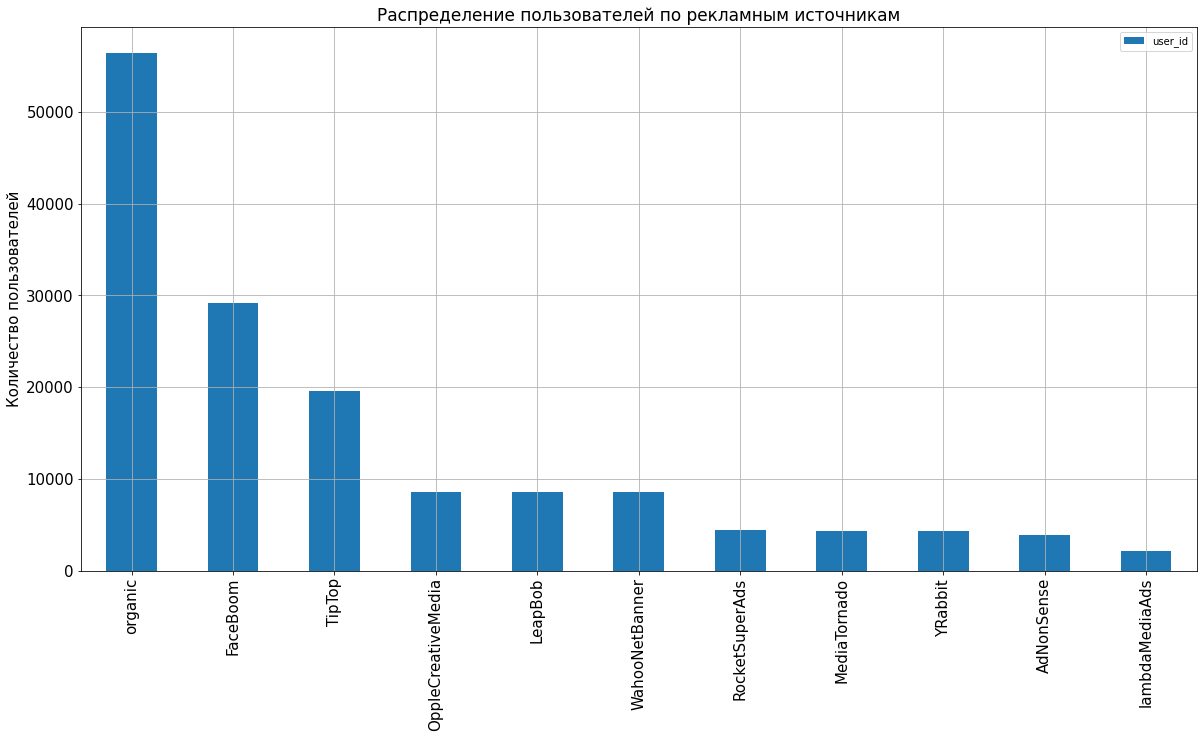

In [64]:
# визуализируем данные таблицы channel
channel.reset_index()
channel.plot(kind='bar', 
             figsize = (20, 10),  
             grid = True, 
             legend = True, 
             fontsize = 15);

plt.ylabel('Количество пользователей', fontsize = 15)
plt.xlabel('')
plt.title('Распределение пользователей по рекламным источникам', fontsize = 17);

plt.show()

Для привлечения пользователей используются такие каналы как: organic, FaceBoom, TipTop, OppleCreativeMedia, LeapBob, WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, AdNonSense и lambdaMediaAds.	Самое большое количество клиентов нашли приложение самостоятельно, канал привлечения organic - 56434 пользователей. Из рекламного источника FaceBoom пришло самое большое количество клиентов - 29139 человек. Самое маленькое количество пришло из рекламного канала lambdaMediaAds - 2149 пользователей.

Узнаем, какое количество платящих пользователей приходят из рекламных источников.

In [65]:
channel = (profiles.groupby('channel')
           .agg({'user_id': 'count',
                 'payer': 'mean'})
           .sort_values(by='payer', ascending=False)
           .style.format({'payer': '{:.2%}'}))
channel

,user_id,payer
channel,,
FaceBoom,29139,12.16%
AdNonSense,3879,11.27%
lambdaMediaAds,2149,10.33%
TipTop,19555,9.56%
RocketSuperAds,4447,7.87%
WahooNetBanner,8552,5.23%
YRabbit,4312,3.80%
MediaTornado,4364,3.57%
LeapBob,8552,3.02%


Визуализируем данные таблицы channel_payer. Но для начала, исходя из доли платящих пользователей, посчитаем их количество.

In [66]:
channel_payer = (profiles.groupby('channel')
                 .agg({'user_id': 'count',
                       'payer': 'mean'})
                 .sort_values(by='payer', ascending=False)) 

# добавим столбец 'count_payer' - количество платящих пользователей
channel_payer['count_payer'] = channel_payer['payer']*channel_payer['user_id']

# переведем значения столбца 'payer' в проценты
channel_payer['payer'] = channel_payer['payer']*100

# округлим значения столбца 'payer' до двух знаков после запятой
channel_payer['payer'] = channel_payer['payer'].round(2)

# переименуем названия столбцов
channel_payer.columns = ['user_id', 'payer, %', 'count_payer']

channel_payer

,user_id,"payer, %",count_payer
channel,,,
FaceBoom,29139,12.16,3543.0
AdNonSense,3879,11.27,437.0
lambdaMediaAds,2149,10.33,222.0
TipTop,19555,9.56,1870.0
RocketSuperAds,4447,7.87,350.0
WahooNetBanner,8552,5.23,447.0
YRabbit,4312,3.80,164.0
MediaTornado,4364,3.57,156.0
LeapBob,8552,3.02,258.0


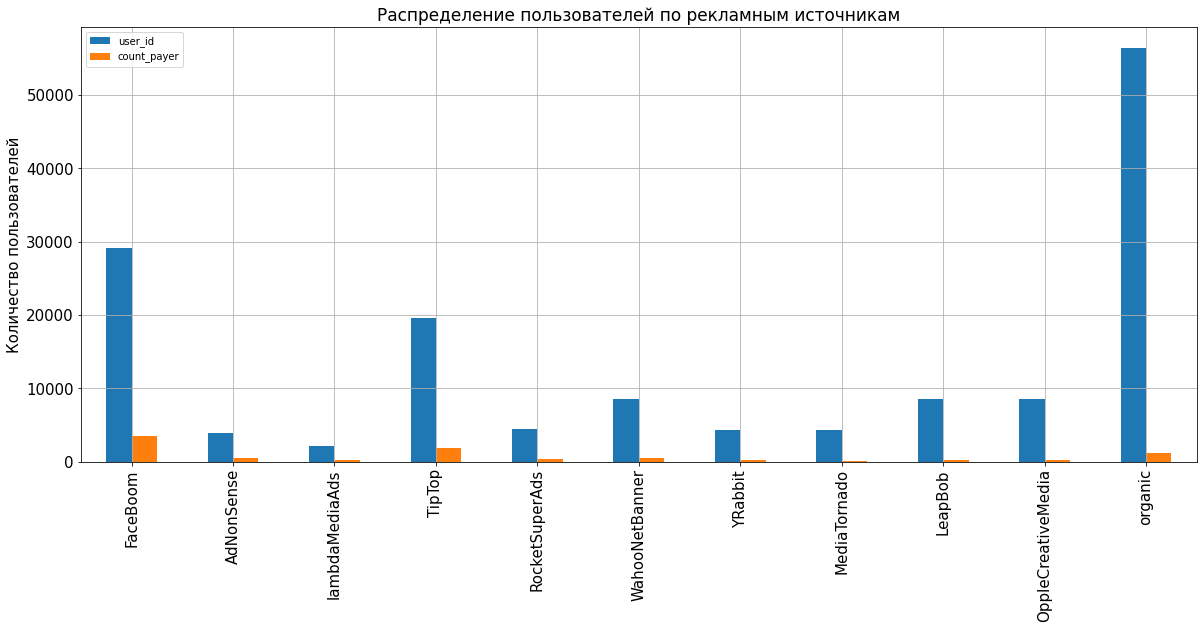

In [67]:
# визуализируем данные по столбцам 'user_id' и 'count_payer'
channel_payer.reset_index()

channel_payer[['user_id','count_payer']].plot(kind='bar', 
                                             figsize = (20, 8),
                                             grid = True,
                                             legend = True, 
                                             fontsize = 15);
plt.ylabel('Количество пользователей', fontsize = 15);
plt.xlabel('', fontsize = 15);
plt.title('Распределение пользователей по рекламным источникам', fontsize = 17)

plt.show()

Гляда на график, можно выделить два рекламных источника привлечения пользователей - FaceBoom и  TipTop. Они выделяются как по количеству пользователей, перешедших в приложение Procrastinate Pro+, так и по количеству платящих пользователей. Количество платящих пользователей, приходящих из таких рекламных источников как:  lambdaMediaAds, YRabbit, MediaTornado, LeapBob и OppleCreativeMedia - очень мало, на графике их количество практически сливается с нулем. Самая маленькая доля платящих пользователей, у тех, кто нашел приложение самостоятельно, несмотря на самое большое их количество.

**Вывод:** для привлечения клиентов используют такие рекламные источники, как: FaceBoom, TipTop, OppleCreativeMedia, LeapBob, WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, AdNonSense и lambdaMediaAds. 

Самая большая доля платящих пользователей пришло из рекламного источника FaceBoom - 12.2%. 

Самая маленькая доля платящих пользователей пришло в приложение самостоятельно - 2.04%.

## Маркетинг

### Общая сумма расходов на маркетинг

Для того, чтобы рассчитать общую сумму расходов на маркетинг, используем таблицу costs, которая хранит в себе дату проведения рекламной кампании, рекламный источник и стоимость рекламы.

In [68]:
costs.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [69]:
# рассчитаем общую сумму расходов на маркетинг
costs.costs.sum().round(2)

105497.3

**Вывод:** общая сумма на маркетинг составляет - 105497.30.

### Распределение расходов на маркетинг по каждому рекламному источнику 

Узнаем, какую сумму потратили на каждый рекламный источник привлечения пользователей.

In [70]:
costs_channel = (costs.groupby('channel')
                 .agg({'costs': 'sum'})
                 .sort_values(by='costs', ascending=False))
costs_channel    

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


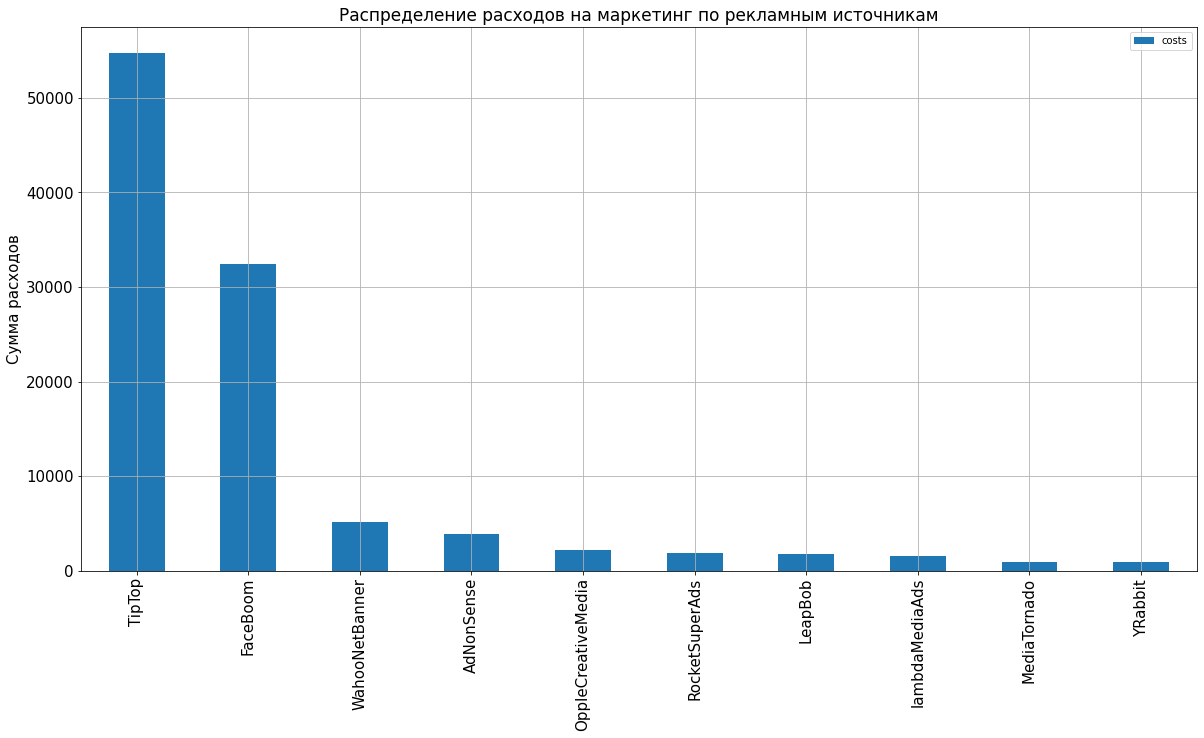

In [71]:
# визуализируем данные таблицы costs_channel
costs_channel.reset_index()
costs_channel.plot(kind='bar', 
                   figsize = (20, 10),  
                   grid = True, 
                   legend = True, 
                   fontsize = 15);

plt.ylabel('Сумма расходов', fontsize = 15)
plt.xlabel('')
plt.title('Распределение расходов на маркетинг по рекламным источникам', fontsize = 17);

plt.show()

Самые большие расходы на маркетинг у рекламных источников TipTop и FaceBoom. Как мы помним, эти же рекламные источники приносили приложению Procrastinate Pro+ самое большое количество клиентов (не считая тех, кто пришел самостоятельно), и самое большое количество платящих пользователей. Расходы на остальные рекламные источники сравнительно малы. 

**Вывод:** самую большую сумму потратили на рекламный источник TipTop - 54751.3 и FaceBoom	- 32445.6. 

Самую маленьку сумму потратили на рекламный источник YRabbit - 944.22.

### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

Для того, чтобы визуализировать динамику изменения расходов по неделям и месяцам по каждому рекламному источнику, необходимо добавить два столбца с неделей и месяцем расходов на маркетинг.

In [72]:
costs['week'] = costs['dt'].astype('datetime64[W]').dt.isocalendar().week
costs['month'] = costs['dt'].astype('datetime64[M]').dt.month
costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,17,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,42,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


Визуализируем данные о динамике расходов на рекламу по неделям и месяцам для каждого источника.

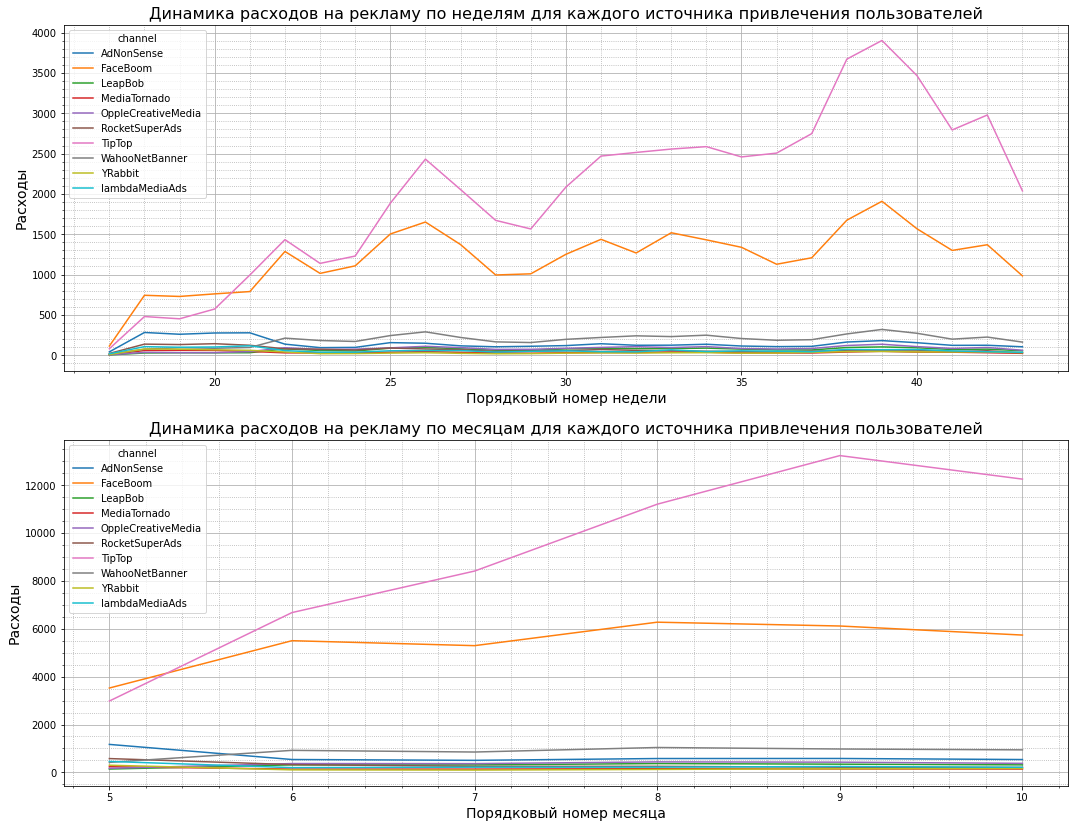

In [73]:
# устанавливаем размер сетки для графиков
plt.figure(figsize=(18, 14))


# строим график динамики расходов на рекламу по неделям для каждого источника
(costs.pivot_table(index='week',
                   columns='channel',
                   values='costs',
                   aggfunc='sum')
 .plot(grid=True, ax=plt.subplot(2, 1, 1)))

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('Порядковый номер недели', fontsize = 14)
plt.ylabel('Расходы', fontsize = 14)
plt.title('Динамика расходов на рекламу по неделям для каждого источника привлечения пользователей', fontsize = 16);


# строим график динамики расходов на рекламу по месяцам для каждого источника
(costs.pivot_table(index='month',
                   columns='channel',
                   values='costs',
                   aggfunc='sum')
 .plot(grid=True, ax=plt.subplot(2, 1, 2)))

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('Порядковый номер месяца', fontsize = 14)
plt.ylabel('Расходы', fontsize = 14)
plt.title('Динамика расходов на рекламу по месяцам для каждого источника привлечения пользователей', fontsize = 16);

plt.show()

Гляда на графики динамики расходов на маркетинг, выделяются два уже знакомых нам рекламных источника - TipTop и FaceBoom. Можно сказать, что расходы на маркетинг компаний TipTop и FaceBoom до 24 недели были практически одинаковыми и постепенно росли. С 24 недели расходы на компанию TipTop заметно увеличились, затем расходы упали, но с 29 по 39 неделю снова начали рости. С 39 недели расходы на маркетинг компании TipTop падают. В это время расходы на маркетинг рекламного источника FaceBoom пратически оставались на одном уровне, что подтверждает график динамики расходов по месяцам. С июня по июль расходы на FaceBoom были на уровне 5500, к августу траты на рекламу выросли до 6500, с августа по октябрь расходы на рекламу медленно снижались, и к октябрю достигли около 6750. Расходы на компанию TipTop с каждым месяцем только росли, в мае они были на уровне 3000, а к сентябрю более 13000. В октябре расходы немного снизились до 12250. 

Среди рекламных источников на которые тратились сравнительно небольшие суммы, можно выделить компании WahooNetBanner и AdNonSense. Расходы на рекламу WahooNetBanner с июня по октябрь находились на уровне 1000, AdNonSense этого же периода - 500. 

Расходы на остальные рекламные компании практически слились в одну линию, это значит, что расходы на них практически не менялись и оставались на одном уровне.

### Средняя стоимость привлечения одного пользователя (САС) из каждого источника

Выведем на экран профили пользователей.

In [74]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


В профилях столбец `acquisition_cost` хранит в себе стоимость привлечения каждого посетителя (САС) приложения Procrastinate Pro+.

Узнаем, сколько в среднем стоило привлечение одного пользоватеял (САС) из каждого источника. Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов - каналы привлечения, а значениями средний САС, и построим по ней график истории изменений.

In [75]:
cac = profiles.pivot_table(index='dt', 
                           columns='channel', 
                           values='acquisition_cost', 
                           aggfunc='mean')
cac

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
dt,,,,,,,,,,,
2019-05-01,1.050000,1.089423,0.210000,0.240000,0.236111,0.540000,0.975610,0.568421,0.289286,0.765217,0.0
2019-05-02,0.962500,1.084722,0.183750,0.229091,0.265625,0.565500,1.000000,0.514286,0.253846,0.730435,0.0
2019-05-03,1.050000,1.128947,0.210000,0.232000,0.239583,0.528387,1.049180,0.600000,0.310345,0.730435,0.0
2019-05-04,1.008824,1.108943,0.199500,0.212727,0.250000,0.531818,0.972222,0.540000,0.294340,0.733333,0.0
2019-05-05,1.020833,1.080531,0.200870,0.230000,0.250000,0.561122,1.012987,0.600000,0.290909,0.752941,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-10-23,1.050000,1.120755,0.214200,0.229565,0.259804,0.276250,3.462366,0.600000,0.281739,0.444444,0.0
2019-10-24,0.954545,1.111000,0.213500,0.219130,0.245098,0.307895,3.411017,0.626866,0.251379,0.640000,0.0
2019-10-25,0.972222,1.104762,0.207042,0.215172,0.253846,0.286000,3.525547,0.620000,0.270000,0.733333,0.0


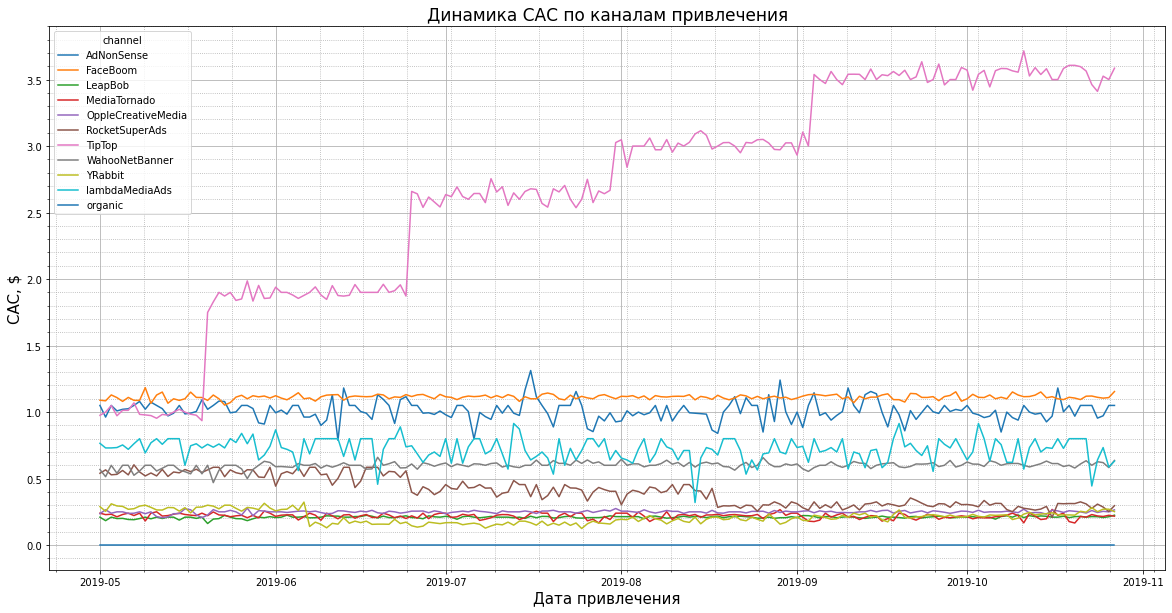

In [76]:
# строим график истории изменений CAC по каналам привлечения
cac.plot(grid=True, figsize=(20, 10))

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.ylabel('CAC, $', fontsize = 15)
plt.xlabel('Дата привлечения', fontsize = 15)
plt.title('Динамика САС по каналам привлечения', fontsize = 17)

plt.show()

Посчитаем средний САС для каждого канала привлечения.

In [77]:
cac_channel = (profiles
               .groupby('channel')
               .agg({'acquisition_cost': 'mean'})
               .sort_values(by='acquisition_cost', ascending=False)
               .rename(columns={'acquisition_cost':'cac'})
               .round(1))

cac_channel

,cac
channel,
TipTop,2.8
FaceBoom,1.1
AdNonSense,1.0
lambdaMediaAds,0.7
WahooNetBanner,0.6
RocketSuperAds,0.4
OppleCreativeMedia,0.3
YRabbit,0.2
MediaTornado,0.2


Посчитаем средния САС по проекту.

In [78]:
cac_channel['cac'].mean().round(1)

0.7

Средний САС по проекту составляет 70 центов.

Стоимость привлечения "органических" пользователей равна нулю, потому что они перешли на приложение Procrastinate Pro+ самостоятельно, а не благодаря рекламе. Привлечение одного пользователя из рекламного источника FaceBoom обошлось компании в среднем в 1.1 доллар, из AdNonSense -  1 доллар, из lambdaMediaAds - 70 центов, из WahooNetBanner - 60 центов, из RocketSuperAds - 40 центов, из компаний OppleCreativeMedia, LeapBob, MediaTornado и YRabbit -  20 центов. Стоимость привлечения одного пользователя из рекламного источника TipTop все время росла: в мае - 1 доллар, в июне - примерно в 1.9 доллар, в июле - около 2.6 доллар, в августе - примерно 3 доллара, в сентябре, октябре - около 3.5 долларов. Такой рост САС из TipTop связан с постоянным увеличением расходов на маркетинг. Средний САС компании TipTop - 2.8 долларов.

## Оценка окупаемости рекламы

### Окупаемость рекламы

Для начала оценим общую ситуацию - посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции `get_ltv()` и `plot_ltv_roi()`. Но для начала, установим момент и горизонт анализа данных. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [79]:
profiles = profiles.query('channel != "organic"')

In [80]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()

# горизонт анализа 
horizon_days = 14

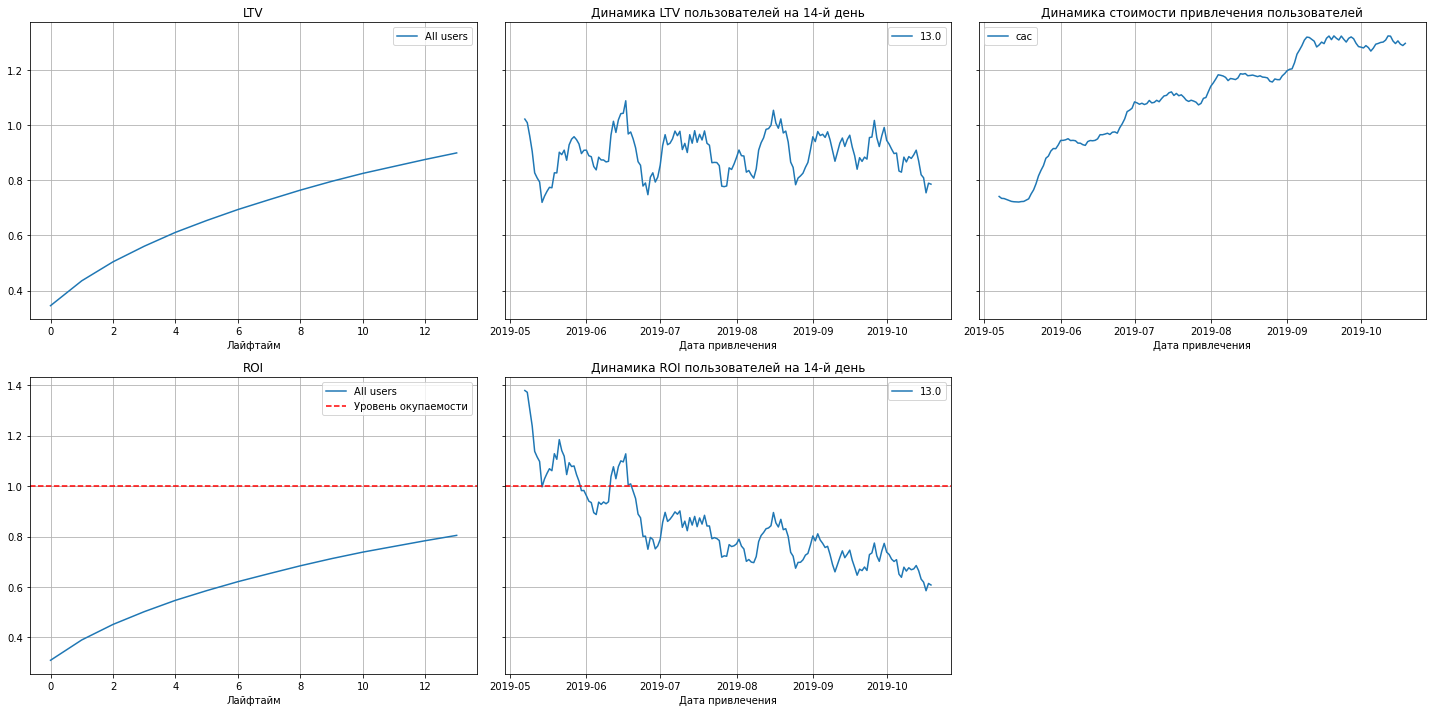

In [81]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы: 

- Реклама не окупается. ROI к концу лайфтайма чуть более 80%.
- CAC растет на протяжении всего периода, скорее всего это связано с увеличением расходов на рекламу.
- ROI снижается на протяжении всего периода, это может лишь подтверждать, что затраты на рекламу больше выручки от рекламной компании.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Убедимся, что LTV, CAC и ROI рассчитаны правильно.

**Проверка LTV, или «Пожизненная ценность»**

1) Сумма размеров когорт равна общему числу новых клиентов в изучаемый период.

In [82]:
ltv_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764563,0.796271,0.825195,0.850494,0.875751,0.899328


In [83]:
ltv_history

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.294282,0.383846,0.435026,0.514359,0.565538,0.565538,0.578333,0.603923,0.680692,0.757538,0.808718,0.872692,0.885487,0.898282
2019-05-02,323,0.324427,0.618235,0.664582,0.757276,0.803622,0.880898,0.911796,0.942693,1.004489,1.035387,1.081734,1.081734,1.112632,1.158978
2019-05-03,346,0.305751,0.452861,0.568237,0.669191,0.943468,0.986734,1.001156,1.001156,1.073266,1.116532,1.130954,1.203064,1.260751,1.304017
2019-05-04,457,0.471904,0.570175,0.624770,0.679365,0.876105,0.952538,0.974376,1.028972,1.061729,1.094486,1.127243,1.181838,1.181838,1.214595
2019-05-05,438,0.232443,0.394429,0.417215,0.462785,0.496963,0.519749,0.553927,0.588105,0.599498,0.622283,0.667854,0.679247,0.713425,0.713425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,442,0.372557,0.440294,0.496742,0.564502,0.609661,0.632240,0.666109,0.688688,0.699977,0.722557,0.767715,0.779005,0.779005,0.779005
2019-10-16,436,0.263257,0.297592,0.380000,0.437225,0.437225,0.471560,0.519633,0.531078,0.553968,0.565413,0.599748,0.599748,0.599748,0.599748
2019-10-17,449,0.369042,0.435724,0.613742,0.624855,0.635969,0.658196,0.669310,0.702650,0.735991,0.791559,0.813786,0.813786,0.813786,0.813786


После учета горизонта и момента анализа данных таблица динамики LTV включает только данные пользователей, привлеченных с 1 мая по 19 октября.

Cверим количество уникальных пользователей за изучаемый период по столбцу `user_id` в профилях и сумму значений `cohort_size` из таблицы ltv_grouped.

In [84]:
report = profiles.query(
    # в профилях находим пользователей, привлечённых с 1 мая по 19 октября 2019 года 
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
)
display(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), ltv_grouped['cohort_size'].sum()
    )
)

'Общее количество новых пользователей: 88644 88644'

Количество пользователей совпадает.

2) Кривая LTV плавно растет, что мы и наблюдаем на графике.

3) Кривая LTV не снижается, что мы и наблюдаем на графике.

Функция для расчета LTV работает корректно.

**Проверка стоимости привлечения клиентов, САС**

Убедимся, что CAC из таблицы ROI, умноженный на размер когорты, равен сумме рекламных трат за изучаемый период.

In [88]:
# рассчитаем ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.683993,0.712359,0.738235,0.760868,0.783464,0.804556


Определим максимальную дату привлечения пользователей по столбцу `dt` из таблицы динамики ROI. Для этого вынесем даты привлечения из индексов и вызовем метод max().

In [89]:
max_acquisition_date = roi_history.reset_index()['dt'].max()

max_acquisition_date

datetime.date(2019, 10, 19)

Максимальная дата привлечения - 19 октября 2019 года. Сложим расходы за все дни до `max_acquisition_date` включительно из таблицы с данными о рекламных тратах и сравним результат с произведением CAC и размера когорты из таблицы ROI.

In [90]:
# сравниваем расходы на привлечение в таблице ROI и тратах на рекламу
display(
   'Общие расходы на привлечение из таблицы ROI: {:.2f}'
    .format(
        roi_grouped.loc['All users', 'cac'] * roi_grouped.loc['All users', 'cohort_size'])
)

display(
   'Общие расходы на привлечение из таблицы costs: {:.2f}'
    .format(costs.query('dt <= @max_acquisition_date')['costs'].sum())
) 

'Общие расходы на привлечение из таблицы ROI: 99085.74'

'Общие расходы на привлечение из таблицы costs: 99085.74'

Результаты совпадают - САС посчитан верно.

**Возврат на инвестиции, или ROI**

Мы проверили LTV и САС, значит ROI посчитан правильно: раз все компоненты верны, верен и результат.

### Конверсия пользователей и динамика ее изменения. Удержание пользователей и динамика ее изменения. 

#### Конверсия пользователей и динамика ее изменения

Проверим конверсию пользователей, передав ей профили со стоимостью привлечения и данные о покупках.

In [91]:
# считаем конверсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

display(conversion, conversion_history)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078934,0.07934,0.079644,0.079859,0.080141


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.058974,0.066667,0.071795,0.071795,0.076923,0.076923,0.076923,0.079487,0.082051,0.082051,0.082051,0.082051,0.082051,0.082051
2019-05-02,323,0.058824,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.071207,0.071207,0.071207,0.071207
2019-05-03,346,0.057803,0.069364,0.075145,0.078035,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.086705
2019-05-04,457,0.070022,0.074398,0.076586,0.078775,0.085339,0.085339,0.087527,0.089716,0.089716,0.091904,0.091904,0.091904,0.091904,0.091904
2019-05-05,438,0.036530,0.043379,0.047945,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,442,0.065611,0.067873,0.072398,0.072398,0.079186,0.081448,0.083710,0.083710,0.083710,0.085973,0.085973,0.085973,0.085973,0.085973
2019-10-16,436,0.045872,0.048165,0.057339,0.057339,0.057339,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633
2019-10-17,449,0.060134,0.066815,0.073497,0.073497,0.075724,0.075724,0.077951,0.077951,0.080178,0.080178,0.080178,0.080178,0.080178,0.080178


**Проверка конверсии, или Conversion Rate**

1) Сумма размеров когорт равна общему числу новых клиентов в изучаемый период.

Сверим количество уникальных пользователей за изучаемый период по столбцу `user_id` в профилях и сумму значений `cohort_size` из таблицы конверсии.

In [92]:
report = profiles.query(
    # в профилях находим пользователей, привлечённых с 1 мая по 19 октября 2019 года
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
)
display(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), conversion['cohort_size'].sum()
    )
) 

'Общее количество новых пользователей: 88644 88644'

Количество пользователей совпадает.

2) Кривая конверсии плавно растёт от нуля в направлении единицы.

Кривая конверсии должна начинаться на уровне конверсии первого дня и затем бесконечно приближаться к единице. Построим кривую конверсии.

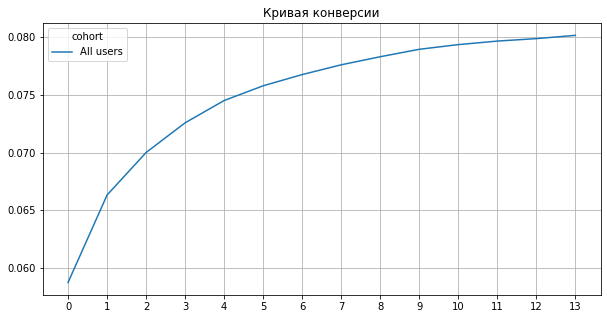

In [93]:
# строим кривую конверсии
report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Кривая конверсии')
plt.show() 

Наша кривая конверсии плавно растет от 0 и стремится к единице.

3) Кривая конверсии не снижается, что мы и наблюдаем на графике.

4) В таблице конверсии нет значений, превышающих единицу.

Убедимся, что в таблицах конверсий нет значений больше единицы. Сделаем срез таблицы конверсии по условию `> 1` и заменим остальные значения на пустую строку методом fillna(). Так в таблице останутся только значения больше единицы.

In [94]:
display(conversion[conversion > 1].fillna('')) 

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,,,,,,,,,,,,,,


В таблице конверсии остался только размер когорты - CR выше единицы нет.

То же самое проделаем с таблицей динамики конверсии.

In [95]:
display(conversion_history[conversion_history > 1].fillna('')) 

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,,,,,,,,,,,,,,
2019-05-02,323,,,,,,,,,,,,,,
2019-05-03,346,,,,,,,,,,,,,,
2019-05-04,457,,,,,,,,,,,,,,
2019-05-05,438,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,442,,,,,,,,,,,,,,
2019-10-16,436,,,,,,,,,,,,,,
2019-10-17,449,,,,,,,,,,,,,,


В таблице динамики конверсии на месте значений по лайфтаймам одни пропуски. Значит, ни в одной из ячеек нет ошибочного значения конверсии.

5) Количество новых покупателей равно числу новых клиентов, умноженному на общую конверсию.

Проверим, равно ли число новых покупателей из таблицы с данными о покупках (`orders`) размеру когорты, умноженному на общую конверсию, то есть конверсию за последний лайфтайм.

In [96]:
# рассчитываем число покупателей по данным из таблицы конверсии
display(
    'Количество уникальных покупателей из таблицы конверсии: {:.0f}'
    .format(
        conversion['cohort_size'][0] * conversion[13.0][0])
) 

'Количество уникальных покупателей из таблицы конверсии: 7104'

Сравним с результатом, полученным из таблицы заказов.

In [97]:
# рассчитываем число покупателей по данным о покупках
# берём данные пользователей, привлечённых между 1 и 19 октября 2019 года
report = orders.merge(
    profiles.query(
        'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
    ),
    on='user_id',
)
# рассчитываем лайфтайм для каждой покупки
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days

# исключаем лишние лайфтаймы
report = report.query('lifetime <= 13')

display(
    'Количество уникальных покупателей из таблицы заказов: {:.0f}'.format(
        len(report['user_id'].unique())
    )
) 

'Количество уникальных покупателей из таблицы заказов: 7104'

Количество покупателей совпадает. Конверсия рассчитана верно.

#### Удержание пользователей и динамика ее изменения

Вызовем написанную ранее функцию `get_retention()`, используя профили пользователей со стоимостью привлечения и журнал сессий. 

In [98]:
# считаем удержание
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

display(retention, retention_history)

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81342,1.0,0.176895,0.086622,0.051843,0.033513,0.024698,0.018650,0.014212,0.011630,0.009405,0.007389,0.006196,0.005913,0.004622
True,7302,1.0,0.380992,0.292933,0.235552,0.210353,0.191454,0.166941,0.156806,0.144892,0.134621,0.133114,0.119830,0.116406,0.103396


cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   
...                       ...  ...       ...       ...       ...       ...   
True  2019-10-15           38  1.0  0.421053  0.263158  0.236842  0.157895   
      2019-10-16           26  1.0  0.500000  0.384615  0.269231  0.076923   
      2019-10-17           36  1.0  0.305556  0.250000  0.194444  0.083333   
      2019-10-18           54  1.0  0.314815  0.314815  0.222222  0.203704   
      2019-10-19           49  1.0  0.367347  0.326531  0.183673  0.183673   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-15  0.105263  0.078947  0.157895  0.131579  0.157895  0.105263   
      2019-10-16  0.153846  0.230769  0.153846  0.115385  0.115385  0.192308   
      2019-10-17  0.111111  0.027778  0.111111  0.166667  0.138889  0.083333   
      2019-10-18  0.333333  0.129630  0.129630  0.203704  0.018519  0.000000   
      2019-10-19  0.183673  0.122449  0.183673  0.102041  0.000000  0.000000   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427  
...                    ...       ...       ...  
True  2019-10-15  0.105263  0.000000  0.000000  
      2019-10-16  0.000000  0.000000  0.000000  
      2019-10-17  0.000000  0.000000  0.000000  
      2019-10-18  0.000000  0.000000  0.000000  
      2019-10-19  0.000000  0.000000  0.000000  

[344 rows x 15 columns]

После учёта горизонта и момента анализа данных таблица удержания включает только данные пользователей, привлечённых с 1 мая по 19 октября 2019 года.

**Проверка удержания, или Retention Rate**

1) Сумма размеров когорт равна числу новых клиентов в изучаемый период.

Посчитаем количество уникальных пользователей за изучаемый период по столбцу `user_id` в профилях и сравним его с суммой значений в столбце `cohort_size` из таблицы удержания.

In [99]:
report = profiles.query(
     # в профилях находим пользователей, привлечённых с 1 мая по 19 октября 2019 года
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
)
display(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), retention['cohort_size'].sum())
)

'Общее количество новых пользователей: 88644 88644'

Количество пользователей совпадает. 

2) Сумма размеров платящих когорт равна числу покупателей в изучаемый период.

Проделаем то же самое, но возьмём только платящих пользователей, добавив условие `payer == True`.

In [100]:
report = profiles.query(
    # в профилях находим платящих пользователей, привлечённых с 1 по 5 мая
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date() and payer == True'
)
print(
    # считаем уникальных платящих пользователей в профилях 
    # и складываем размеры платящих когорт
    'Общее количество новых покупателей: {} {}'.format(
        len(report['user_id'].unique()),
        retention.query('payer == True')['cohort_size'].sum())  
) 

Общее количество новых покупателей: 7302 7302


Количество платящих пользователей совпадает.

3) Удержание убывает по экспоненциальному закону.

4) Удержание неплатящих убывает быстрее, чем удержание платящих.

Посмотрим на кривые удержания. Когда удержание посчитано верно, кривая платящих пользователей находится выше, чем кривая неплатящих.

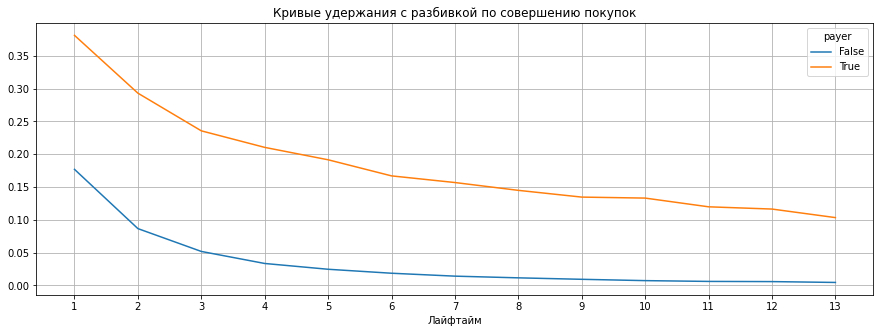

In [101]:
# строим кривые удержания
report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show()

Все верно: кривая удержания платящих пользователей выше, чем неплатящих, обе кривые постепенно снижаются.

### Окупаемость рекламы с разбивкой по устройствам

Проверим, окупается ли реклама с разбивкой по устройствам.

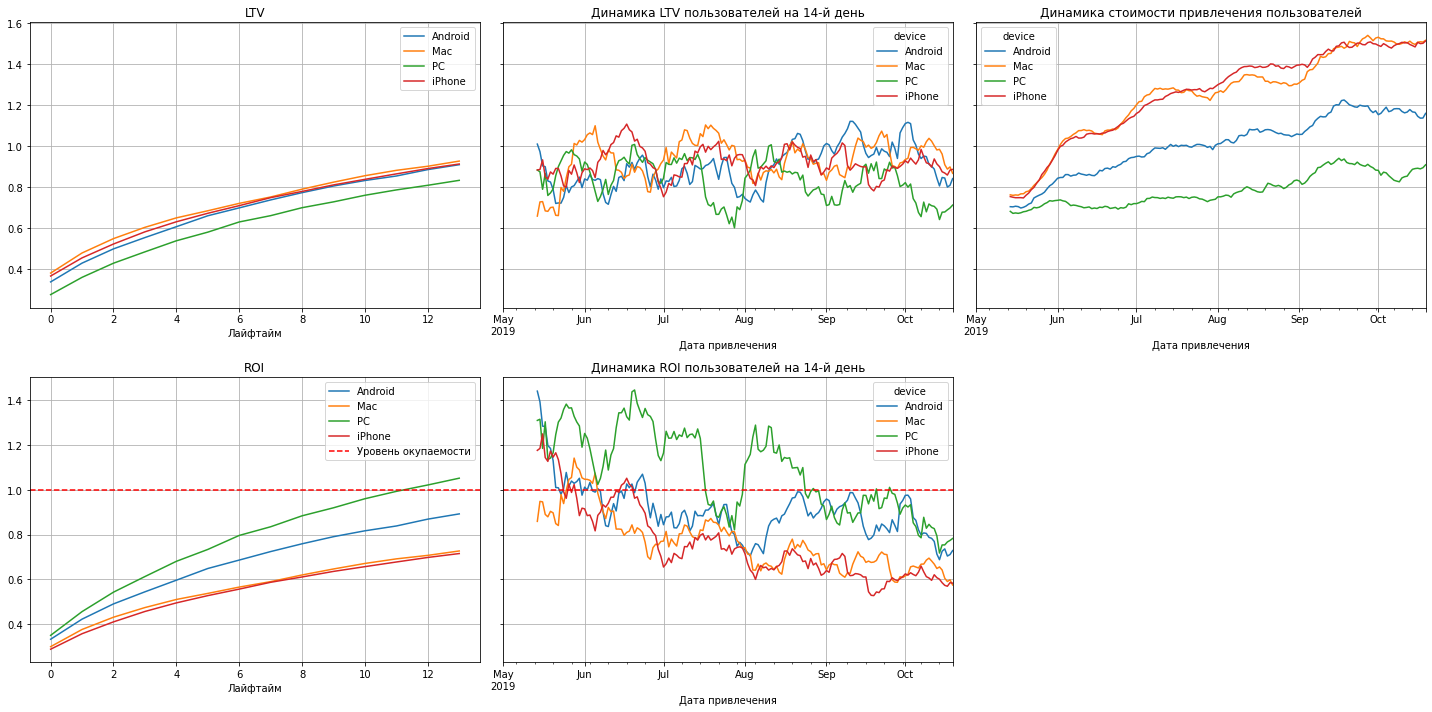

In [102]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По графикам можно сделать следующие выводы:

- Пожизненная ценность клиентов Android, Mac и iPhone, выше, чем у пользователей PC. При этом динамика LTV пользователей достаточно стабильна.
- Динамика стоимости привлечения у всех пользователй растет (что мы и наблюдали при оценке общей ситуации), но особенно сильный рост и высокая стоимость привлечения у пользователей Mac и iPhone.
- Пользователи PC окупаются, а вот пользователи Android, Mac и iPhone - нет.
- Динамика ROI показывает, что c июля пользователи Android, Mac и iPhone - не окупались. Пользователи PC перестали окупаться в сентябре.

Проверим, в чем может быть причина: в низкой конверсии или низком удержании. Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

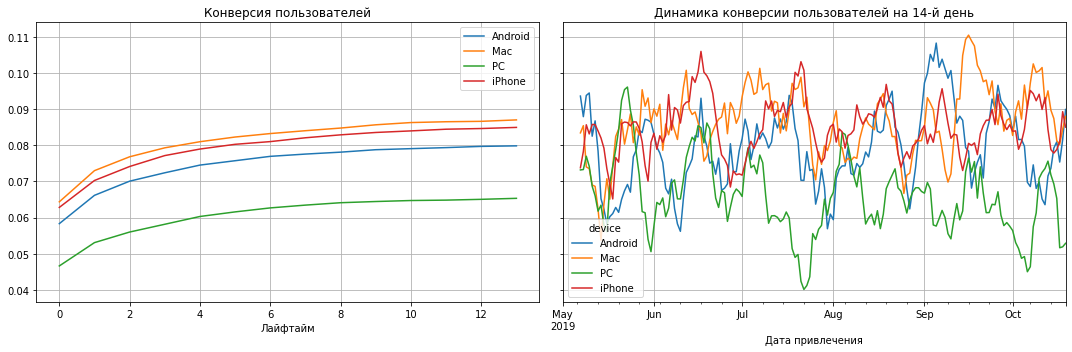

In [103]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

На графике пользователи Mac и iPhone конвертируются лучше всех, причем постоянно. Пользователи Android конвертируются хуже, чем Mac и iPhone. Посмотрим на удержание пользователей.

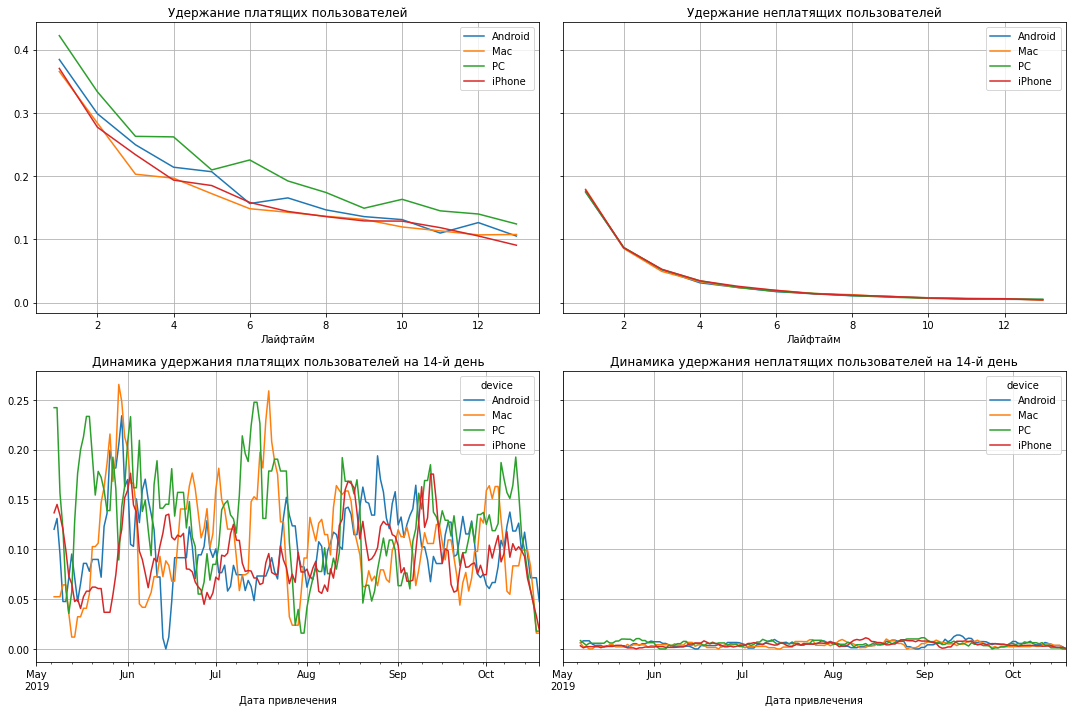

In [104]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

На графике удержания, мы видим, что платящие пользователи Android, Mac и iPhone удерживаются немного хуже, чем пользователи PC. Обратим внимание, что удержание всех платящих пользователей падает с 40 до 10 процентов. Особенно, резкое падение наблюдается с 1 по 4 лайфтайм. К концу лайфтайма удержание всех платящих пользователей колеблется от 10 до 15%, что и подтверждает график динамики удержания платящих пользователей за весь период. Это низкий показатель.

Удержание для неплатящих пользователей абсолютно одинаково для всех устройств, и стремится к нулю, что и подтверждает график динамики удержания.

**Можем сделать следующие выводы:**
- Удержание пользователей на всех устройствах находится на низком уровне;
- Стоимость привлечения пользователей Android, Mac и iPhone гораздо выше, чем выручка от рекламной компании, поэтому эти пользователи не окупаются.

**Промежуточная рекомендация для рекламного отдела:**
    
- Обратить внимание на удержание всех пользователей;
- Снизить затраты на рекламу для пользователей Android, Mac и iPhone.

### Окупаемость рекламы с разбивкой по странам

Проверим окупаемость рекламы с разбивкой по странам.

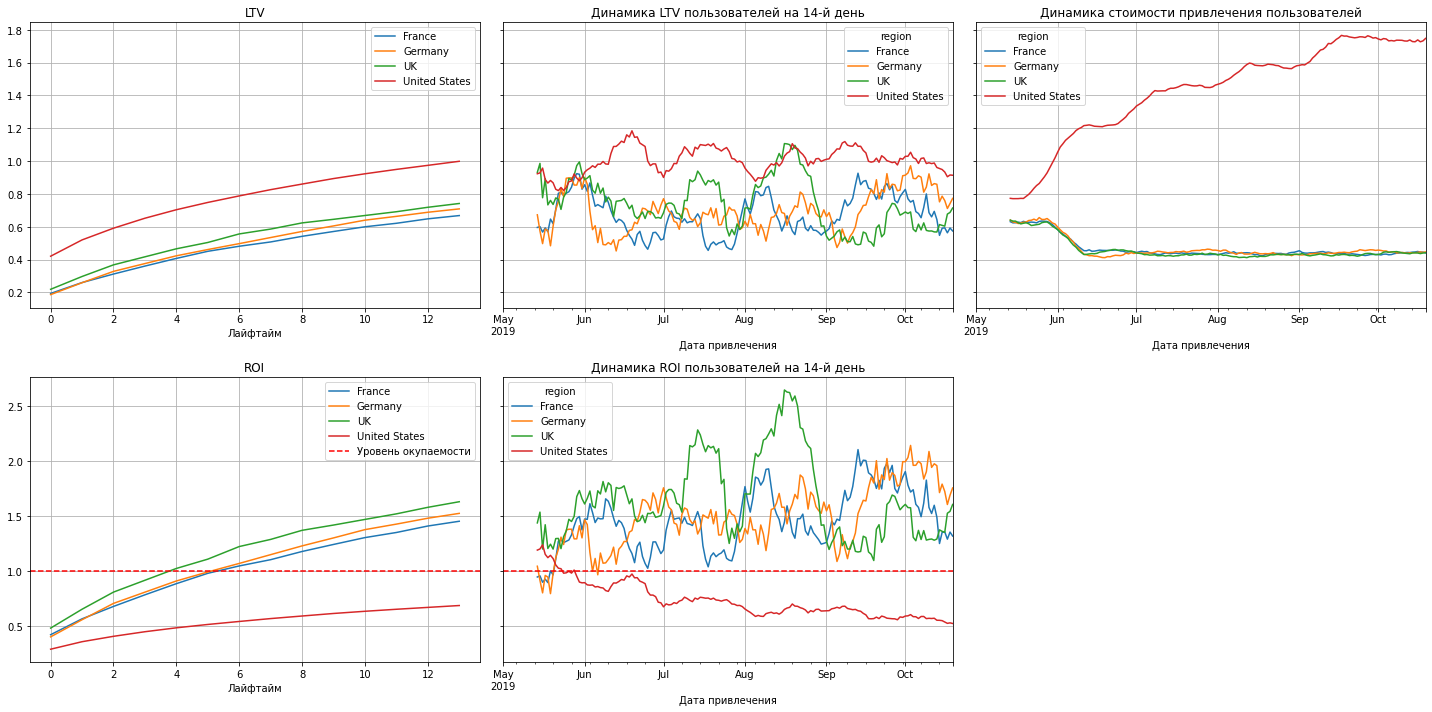

In [105]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Глядя на графики можем сделать следующие выводы:
    
- Самая высокая "пожизненная" ценность клиентов из США. В остальных странах она примерно на одном уровне. Мы помним, что самое большое количество пользователей приходят именно из Америки.
- Стоимость привлечения клиентов из США растет и находится на очень высоком уровне. В остальных странах стоимость привлечения с мая по июнь немного упала и оставалась одинаковой и стабильной до конца периода.
- Пользователи из Америки не окупаются.
- Пользователи из Америки перестали окупаться с июня месяца. Динамика окупаемости в остальных странах находится на высоком уровне и стабильна.

Изучим конверсию и удержание пользователей по странам.

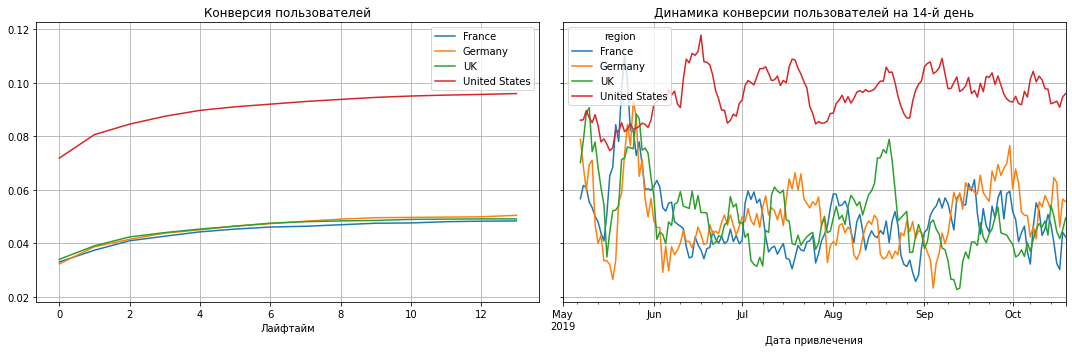

In [106]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

На графике пользователи из Америки конвертируются лучше всех, причем постоянно. Посмотрим на удержание пользователей.

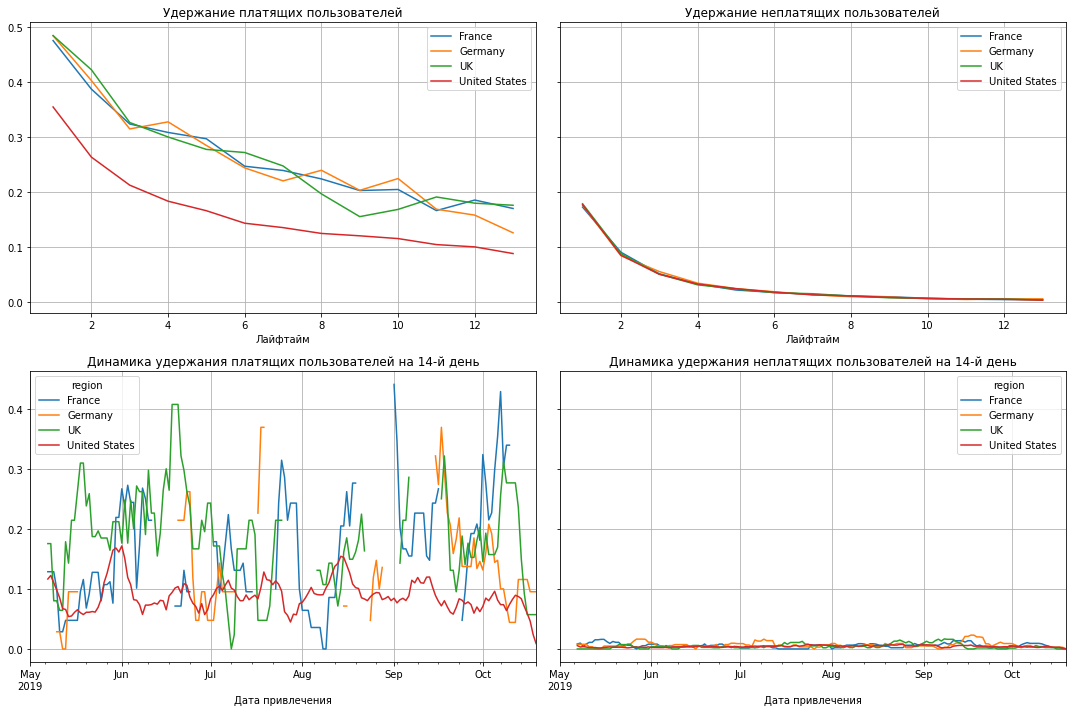

In [107]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

Платящие пользователи из США удерживаются хуже остальных стран. Динамика удержания платящих пользователей из Америки находится на очень низком уровне - около 10%.

Удержание неплатящих пользователей в течение лайфтайма стремится к нулю, что подтверждает график динамики удержания неплатящих пользователей.

**Выводы:**
- Низкое удержание пользователей из США;
- Высокая стоимость привлечения пользователей из США.

**Промежуточные рекомендации для рекламного отдела:**
- Обратить внимание на удержание пользователей из США;
- Снизить расходы на рекламу для пользователей из США.

### Окупаемость рекламы с разбивкой по рекламным каналам

Узнаем, окупаются ли расходы на маркетинг с разбивкой по рекламным каналам.

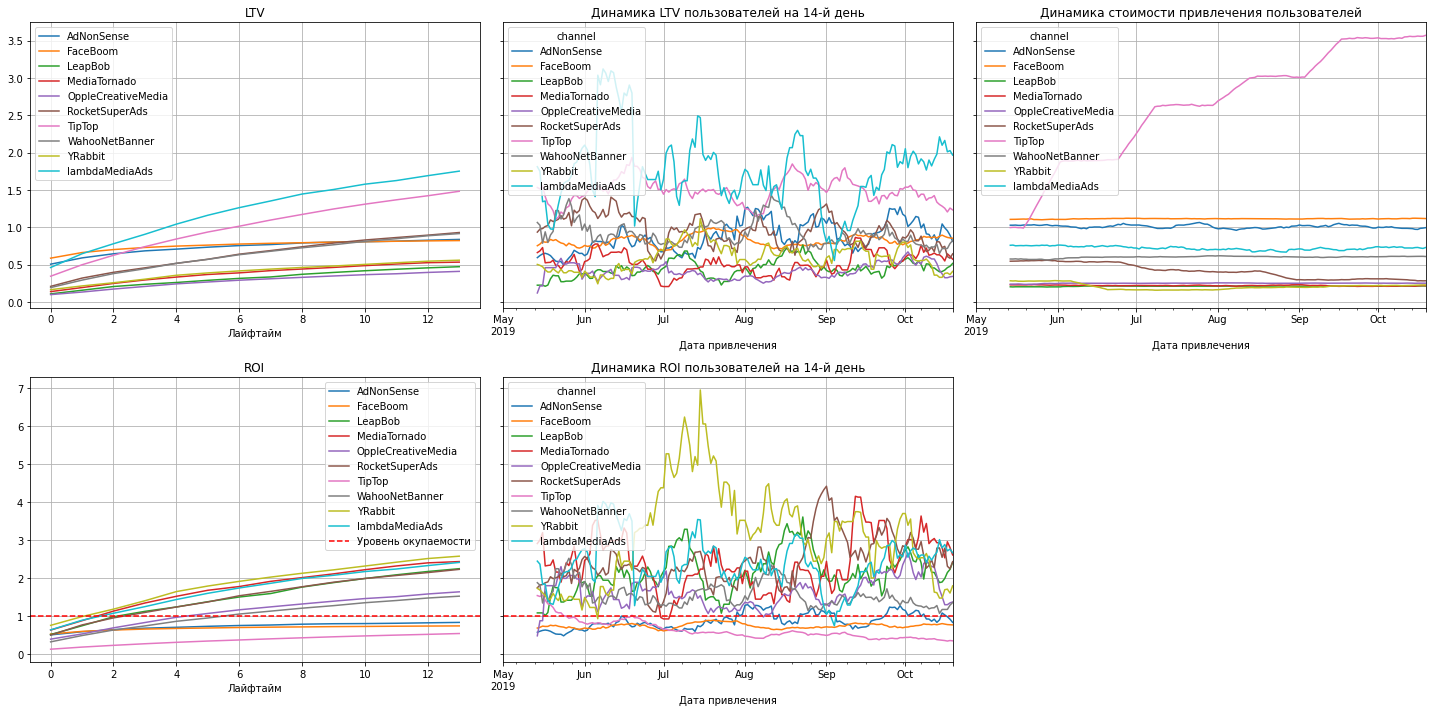

In [108]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Для удобства прочтения графиков динамики LTV, CAC и ROI, сгладим их, с помощью ранее написаной функции`filter_data`.

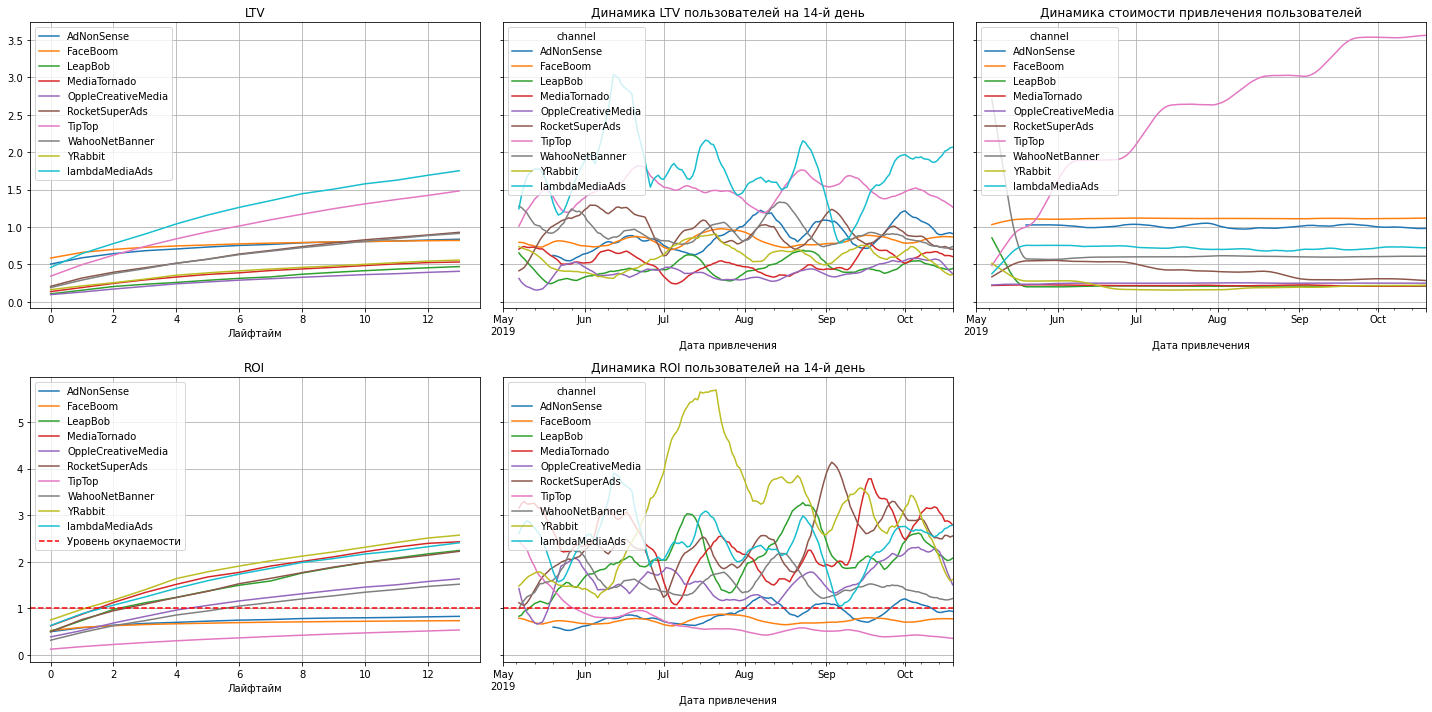

In [109]:
# установим ширину окна сглаживания данных
window = 14

plot_ltv_roi(
    ltv_grouped, filter_data(ltv_history, window), roi_grouped, filter_data(roi_history, window), horizon_days)  

Глядя на графики можем сделать следующие выводы:
- Самая высокая "пожизненная" ценность клиентов, которые приходят из источников lambdaMediaAds и TipTop. 
- Динамика LTV пользователей из источников lambdaMediaAds и TipTop выше остальных.
- График стоимости привлечения из рекламного источника TipTop имеет знакомый нам вид, растет быстро и ступенчато.
- Источники привлечения AdNonSense, FaceBoom и TipTop - не окупаются. 

Узнаем конверсию и удержание пользователей в зависимости от рекламного источника.

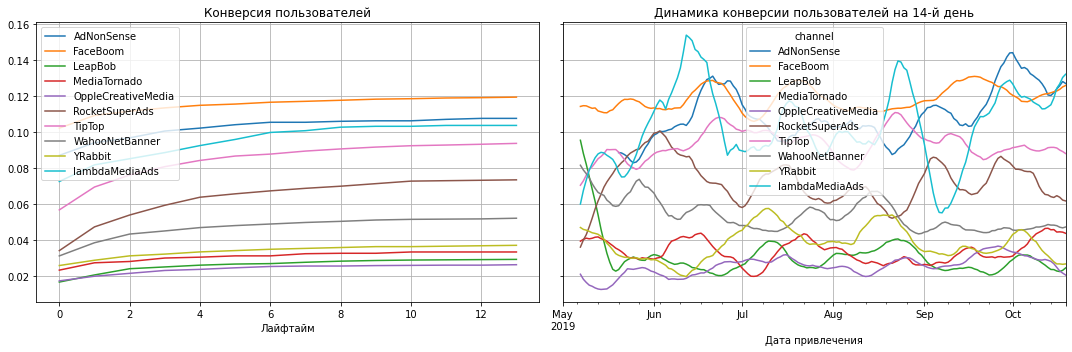

In [110]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, filter_data(conversion_history, window), horizon_days)

На графике можно выделить четыре рекламных источника, приходя из которых, пользователи конвертируются лучше всех: Faceboom, AdNonSense, lambdaMediaAbs и TipTop, при этом из них самая стабильная конверсия у Faceboom.

Посмотрим на удержание пользователей.

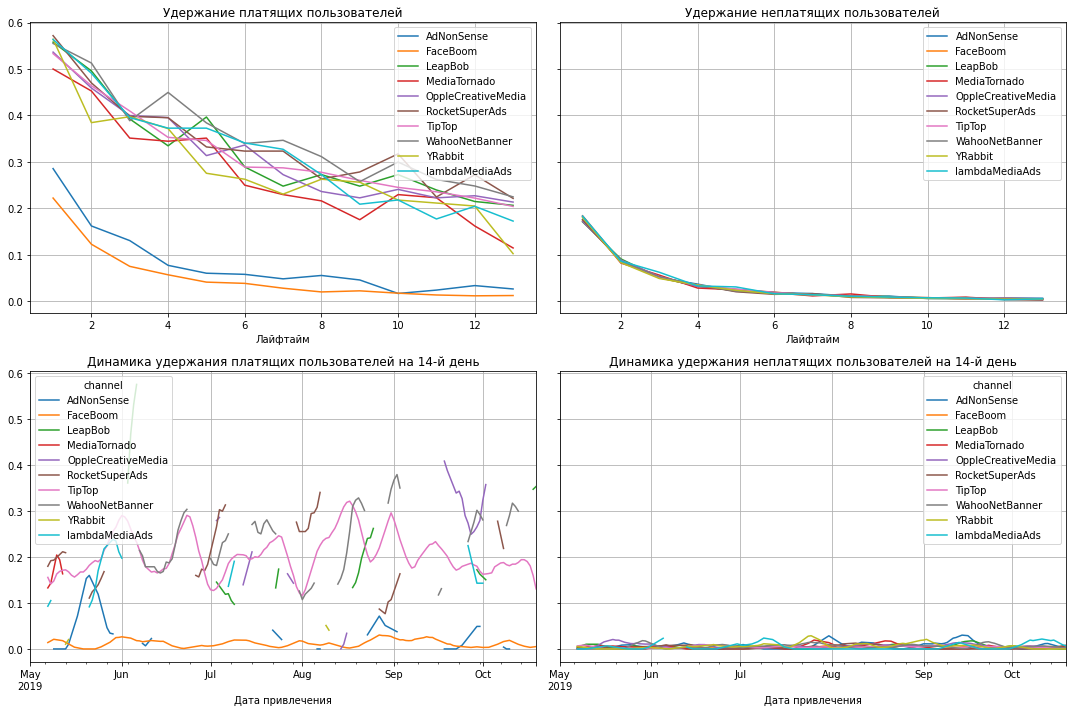

In [111]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, filter_data(retention_history, 7), horizon_days)

На графиках мы наблюдаем плохое удержание пользователей из рекламных источников Faceboom и AdNonSense, при этом удержание платящих пользователей FaceBoom на 14-й день лайфтайма стабильно очень низкое.

Удержание неплатящих пользователей в течение лайфтайма стремится к нулю, что подтверждает график динамики удержания неплатящих пользователей.

**Выводы:**
- Высокая стоимость привлечения из рекламного источника TipTop;
- Плохое удержание платящих пользователей из рекламного источника FaceBoom и AdNonSense.

**Промежуточная рекомендация для рекламного отдела:**

- Снизить расходы на маркетинг TipTop;
- Обратить внимание на удержание пользователей ркламных источников FaceBoom и AdNonSense.

## Общий вывод

**На этапе предобработки данных мы проделали следующую работу:**
1) В датарейме `visits`:
- изменили и/или привели к нижнему регистру названия следующих столбцов: `user_id`, `region`, `device`, `channel`, `session_start` и `session_end`;
- привели столбцы `session_start` и `session_end` к типу datetime.

 В датарейме `orders`:
- изменили и/или привели к нижнему регистру названия следующих столбцов: `user_id`, `event_dt` и `revenue`;
- привели столбец `event_dt` к типу datetime.

 В датарейме `costs`:
- привели к нижнему регистру названия следующих столбцов: `dt`,	`channel` и `costs`;
- привели данные столбца `dt` к date.

2) Задали функции для вычисления следующих метрик:
- `get_profiles()` - для создания профилей пользователей,
- `get_retention()` - для подсчёта Retention Rate,
- `get_conversion()` - для подсчёта конверсии,
- `get_ltv()` - для подсчёта LTV.

А также функции для построения графиков:
- `filter_data()` - для сглаживания данных,
- `plot_retention()` - для построения графика Retention Rate,
- `plot_conversion()` - для построения графика конверсии,
- `plot_ltv_roi` - для визуализации LTV и ROI.

**Провели исследовательский анализ данных:**

*1) Составили профили пользователей. Определили минимальную и максимальную даты привлечения.*
- Минимальная дата привлечения - 1 мая 2019 года,
- Максимальная дата привлечения - 27 октября 2019 года.

*2) Определили страны, из которых пользователи приходят в приложение.* 
- США - 99987 пользователей,
- Великобритания - 17573 пользователей,
- Франция -	17448 пользователей,
- Германия - 14978 пользователей.

Самая большая доля платящих пользователей приходят из США - 6.9%.

*3) Определили устройства, которыми пользуются клиенты.*
- iPhone - 54468 пользователей,
- Android - 35030 пользователей,
- PC - 30451 пользователей,
- Mac - 30037 пользователей.

Самая большая доля платящих пользователей используют Mac - 6.36%.

*4) Определили рекламные источники привлечения.* 
- FaceBoom - 29139 пользователей,
- TipTop - 19555 пользователей,
- OppleCreativeMedia - 8603 пользователей,
- LeapBob - 8552 пользователей,
- WahooNetBanner - 8552 пользователей,
- RocketSuperAds - 4447 пользователей,
- MediaTornado - 4364 пользователей,
- YRabbit - 4312 пользователей,
- AdNonSense - 3879 пользователей,
- lambdaMediaAds - 2149 пользователей.

Самая большая доля платящих пользователей пришла из источника FaceBoom - 12.2%.

**Провели исследование маркетинга:**

*1) Посчитали общую сумму расходов на маркетинг.* 

Общая сумма на маркетинг составила 105497.30 долларов.

*2) Выяснили, как траты распределены по рекламным источникам.*
- TipTop - 54751.30 долларов,
- FaceBoom - 32445.60 долларов,
- WahooNetBanner - 5151.00 долларов,
- AdNonSense - 3911.25 долларов,
- OppleCreativeMedia - 2151.25 долларов,
- RocketSuperAds - 1833.00 долларов,
- LeapBob - 1797.60 долларов,
- lambdaMediaAds - 1557.60 долларов,
- MediaTornado - 954.48 долларов,
- YRabbit - 944.22 долларов.

*3) Исследовали динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.*
- Самые высокие расходы на маркетинг у рекламного источника TipTop, расходы непрерывно росли, а в сентябре достигли своего рекорда - более 12200 долларов. 
- Высокие расходы на маркетинг у рекламного источника FaceBoom, но с июня они были стабильны и находились на уровне около 6000 долларов в месяц.
- Расходы на рекламу WahooNetBanner и AdNonSense были стабильны и находились на уровне 1000 и 500 долларов в месяц.
- Расходы на остальные рекламные компании были минимальными и стабильными.

*4) Выяснили, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.*
- TipTop - 2.8 доллара
- FaceBoom - 1.1 долларов, 
- AdNonSense - 1 доллар,
- lambdaMediaAds - 70 центов, 
- WahooNetBanner - 60 центов, 
- RocketSuperAds - 40 центов, 
- OppleCreativeMedia, LeapBob, MediaTornado и YRabbit - 20 центов.

Стоимость привлечения одного пользователя из рекламного источника TipTop все время росла: в мае - 1 доллар, в июне - примерно 1.9 доллар, в июле - около 2.6 долларов, в августе - примерно 3 доллара, в сентябре, октябре - около 3.5 долларов. Такой рост САС из TipTop связан с постоянным увеличением расходов на маркетинг.

**Оценили окупаемость рекламы:**
1. Пользователи Android, Mac и iPhone не окупаются из-за очень высокой стоимости привлечения и недостаточно высокого коэффициента удержания.
2. Пользователи из Америки не окупаются из-за очень высокой стоимости привлечения и низкого коэффициента удержания.
3. Источники привлечения AdNonSense, FaceBoom и TipTop - не окупаются. У компании AdNonSense - низкий показатель привлечения и коэффициента удержания, у FaceBoom - очень низкий коэффициент удержания, TipTop - очень высокая стоимость привлечения. 

**Рекомендации для отдела маркетинга: пересмотреть расходы на маркетинг, а именно снизить расходы на пользователей Mac и iPhone, пользователей из Америки, и на рекламные источники TipTop и AdNonSense. Обратить особое внимание на коэффициент удержания пользователей из Америки и рекламного источника FaceBoom, также необходимо увеличить коэффициент удержания пользователей для всех устройств. Я бы посоветовала обратить внимание на каналы RocketSuperAds и WahooNetBanner. У этих источников привлечения достаточно стабильная динамика ROI, конверсии и удержания пользователей.**